Tutorials
---------

- [sklearn - Connectivity-constrained clustering (unsupervised)](http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html#connectivity-constrained-clustering)
- [sklearn - spectral clusting (unsupervised)](http://scikit-learn.org/stable/modules/clustering.html#different-label-assignment-strategies)
- [sklearn - hierarchical clustering example (unsupervised)](http://scikit-learn.org/stable/auto_examples/cluster/plot_face_ward_segmentation.html)


Unsupervised Clustering
-----------------------

- K-means
- Affinity Propagation
- Mean Shift
- Spectral Clustering
- Hierarchical Clustering
- Agglomerative Clustering (hierarchical)
- Ward Clustering (hierarchical) - [notebook](#Ward-clustering)

Scikit-image?


Look at [clustering with and without structure](http://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering.html#sphx-glr-auto-examples-cluster-plot-agglomerative-clustering-py).

In [1]:
%matplotlib inline

In [2]:
import os.path as op
import time

import matplotlib.pyplot as plt
import nibabel as nib
from nibabel.testing import data_path
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from sklearn.cluster import (KMeans, AgglomerativeClustering, 
                             FeatureAgglomeration, SpectralClustering,
                             spectral_clustering)
from sklearn.feature_extraction.image import grid_to_graph, img_to_graph

In [3]:
# Load the MRI scan and extract ndarray of data.
img = nib.load('/Users/jakubkaczmarzyk/Downloads/case_058_2.nii.gz')
img_data = img.get_data()

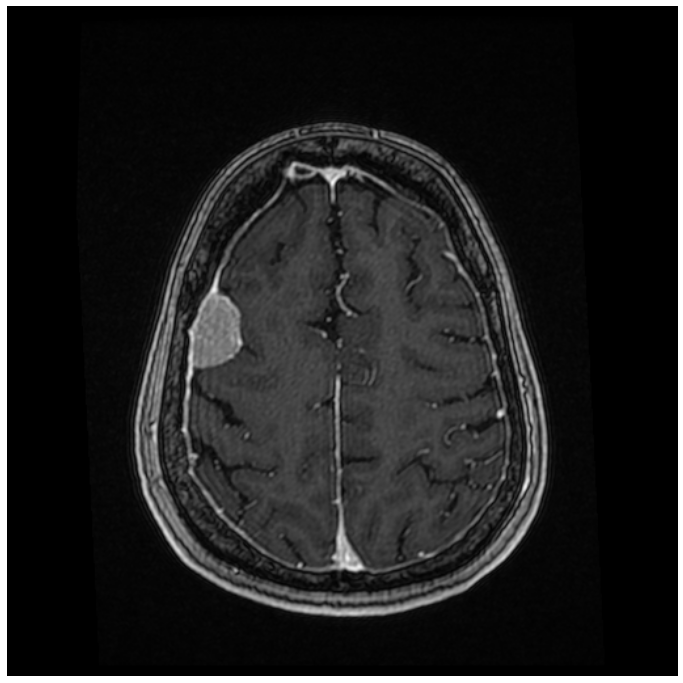

In [5]:
# def show_slices(slices):
#     """Function to display row of image slices."""
#     fig, axes = plt.subplots(1, len(slices))
#     for i, slice_ in enumerate(slices):
#         axes[i].imshow(slice_.T, cmap='gray', origin='lower')

# slice_0 = img_data[256,:,:]
# slice_1 = img_data[:,:,89]
# show_slices([slice_0, slice_1])

# # Interactive viewer
# viewer = nib.viewers.OrthoSlicer3D(img_data, affine=img.affine)

# Plot one image.
fig, ax1 = plt.subplots(figsize=(12,12))
plt.imshow(img_data[:,:,89].T, cmap='gray', origin='lower')
ax1.set_xticks(())
ax1.set_yticks(())
plt.show()

In [6]:
# Values in different parts of the image.
# This scan used a contrast agent.

# Meningioma. Axial slice.
meningioma_only = img_data[143:170, 241:271, 89]
print("Meningioma: mean = {:.2f} +/- {:.2f}".format(
        meningioma_only.mean(), meningioma_only.std()))

print meningioma_only.min(), meningioma_only.max()

# Brain matter (next to meningioma). Axial slice.
brain_only = img_data[160:240, 210:240, 89]
print("Brain: mean = {:.2f} +/- {:.2f}".format(
        brain_only.mean(), brain_only.std()))

# Skull. Axial slice.
skull_only = img_data[98:115,170:200,89]
print("Skull: mean = {:.2f} +/- {:.2f}".format(
        skull_only.mean(), skull_only.std()))

# Divot in occipital lobe. Axial slice.
divot_only = img_data[250:265,80:105,89]
print("Divot: mean = {:.2f} +/- {:.2f}".format(
        divot_only.mean(), divot_only.std()))

# Black spaces in the image are zero.

Meningioma: mean = 1745.11 +/- 172.07
1272.02098082 2673.04584956
Brain: mean = 915.74 +/- 116.67
Skull: mean = 1631.95 +/- 578.33
Divot: mean = 2209.31 +/- 697.61


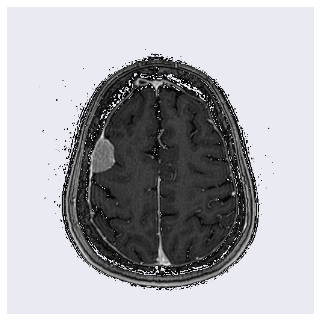

In [20]:
# Trying to remove background (removing values below a threshold).
one_slice = img_data[:,:,89].T.copy()
one_slice[one_slice < 180] = 0
one_slice[one_slice == 0 ] = np.nan
plt.imshow(one_slice, cmap=plt.cm.gray, origin='lower')
plt.yticks(())
plt.xticks(())
plt.show()

# Ward clustering

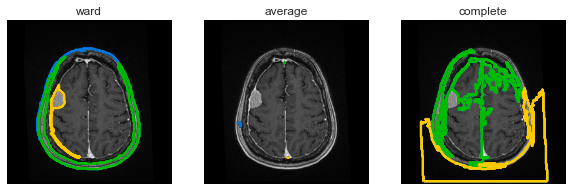

In [11]:
# To resize...
one_slice = sp.misc.imresize(img_data[:,:,89].T.copy(), 0.50)

# one_slice = img_data[:,:,89].T.copy()
X = np.reshape(one_slice, (-1, 1))
connectivity = grid_to_graph(*one_slice.shape)
n_clusters = 4
linkge_args = ['ward', 'average', 'complete']

fig = plt.figure(figsize=(10, len(linkge_args)))
for i, linkage in enumerate(linkge_args):
    # Figure out the clusters.
    ward = AgglomerativeClustering(n_clusters=n_clusters, 
                                   linkage=linkage,
                                   connectivity=connectivity)
    ward.fit(X)
    label = np.reshape(ward.labels_, one_slice.shape)
    
    ax = fig.add_subplot(1, len(linkge_args), i+1)
    ax.imshow(one_slice, cmap=plt.cm.gray, origin='lower')
    for l in range(n_clusters):
        ax.contour(label == l, contours=1,
                    colors=[plt.cm.spectral(l / float(n_clusters)), ])
    ax.set_title(linkage)
    plt.xticks(())
    plt.yticks(())